In [4]:
import pandas as pd
import numpy as np

# visualizar todas las columnas
pd.set_option('display.max_columns', None)


df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')  # en archivos temporales


df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [7]:
df['Churn'].value_counts(normalize=True)

,proportion
Churn,
No,0.73463
Yes,0.26537


<Axes: xlabel='Churn'>

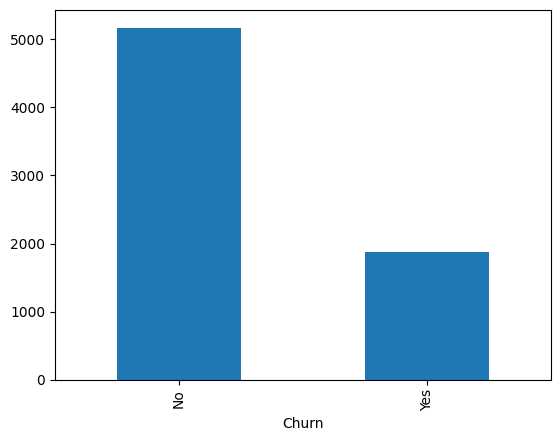

In [8]:

df['Churn'].value_counts().plot(kind='bar')


In [9]:
num_cols=df.select_dtypes(include=np.number).columns
cat_cols =df.select_dtypes(include=['object']).columns

num_cols,cat_cols

(Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object'),
 Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
        'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
        'Churn'],
       dtype='object'))

In [10]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


df['TotalCharges'].isna().sum()

np.int64(11)

# Analisis y visualización de data:

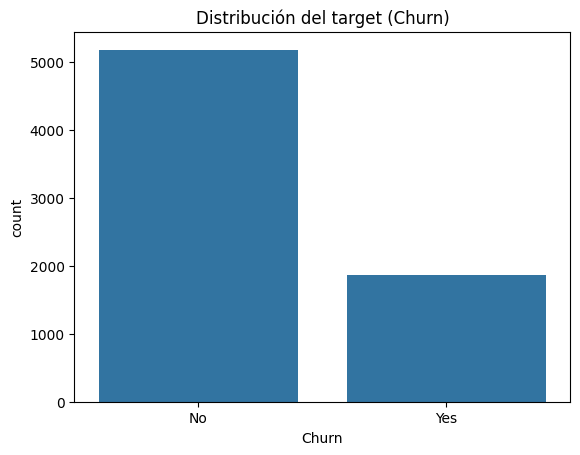

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df, x='Churn')
plt.title("Distribución del target (Churn)")
plt.show()


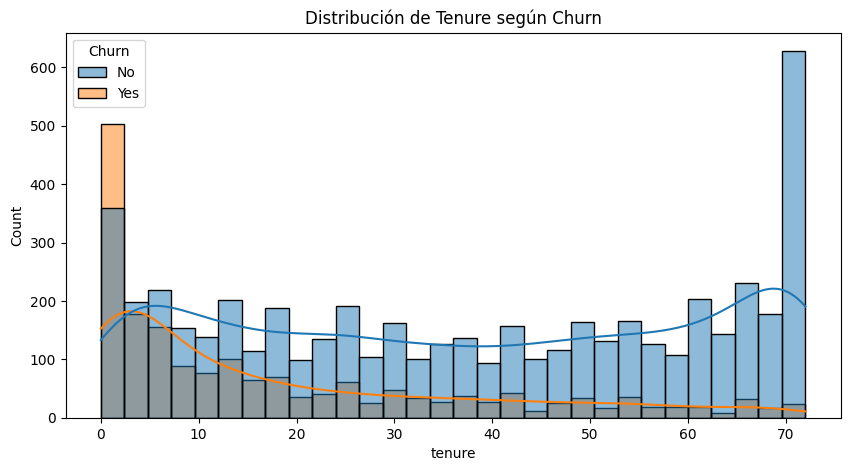

In [13]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='tenure', hue='Churn', kde=True, bins=30)
plt.title("Distribución de Tenure según Churn")
plt.show()


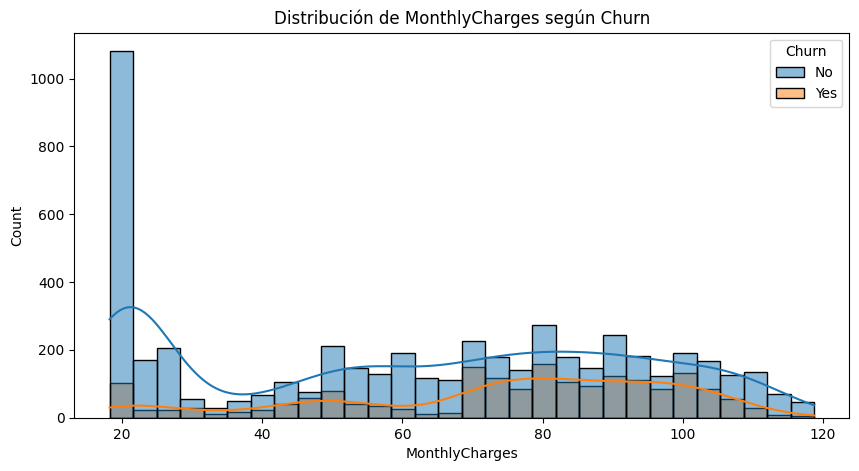

In [15]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', kde=True, bins=30)
plt.title("Distribución de MonthlyCharges según Churn")
plt.show()


In [20]:
df[['MonthlyCharges','tenure']]

#MonthlyCharges es en funcion de los servicios contratados (ej: PhoneService,InternetService, etc)

,MonthlyCharges,tenure
0,29.85,1
1,56.95,34
2,53.85,2
3,42.30,45
4,70.70,2
...,...,...
7038,84.80,24
7039,103.20,72
7040,29.60,11
7041,74.40,4


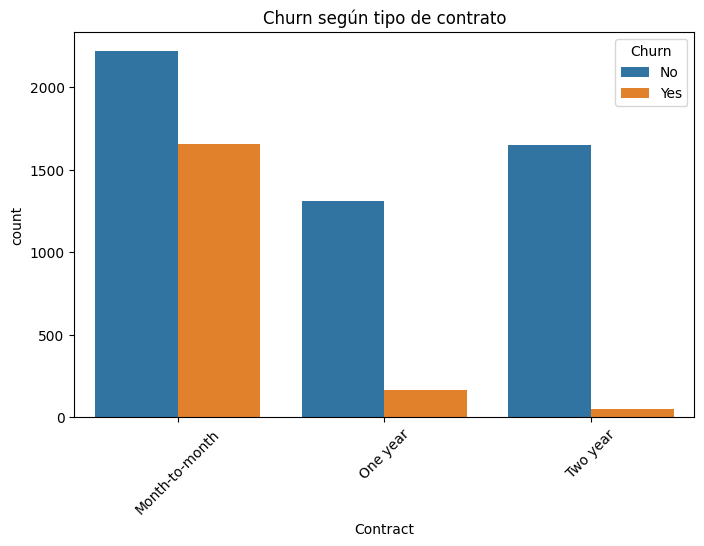

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title("Churn según tipo de contrato")
plt.xticks(rotation=45)
plt.show()


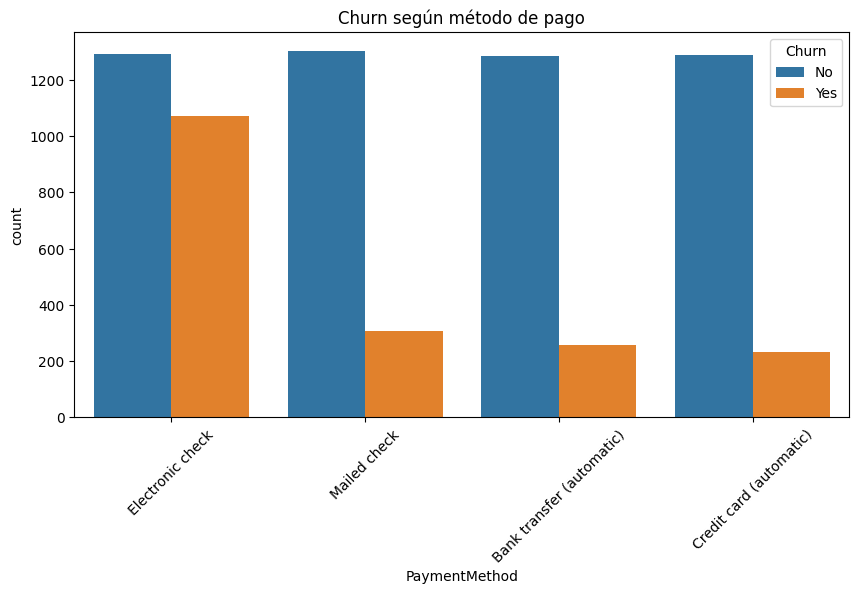

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='PaymentMethod', hue='Churn')
plt.title("Churn según método de pago")
plt.xticks(rotation=45)
plt.show()


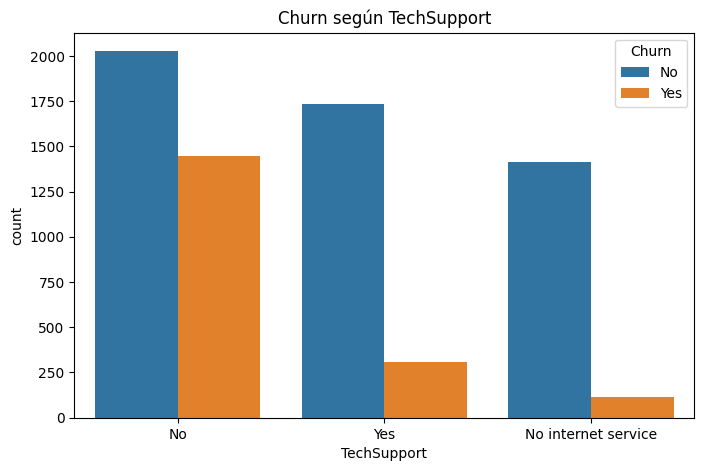

In [23]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='TechSupport', hue='Churn')
plt.title("Churn según TechSupport")
plt.show()


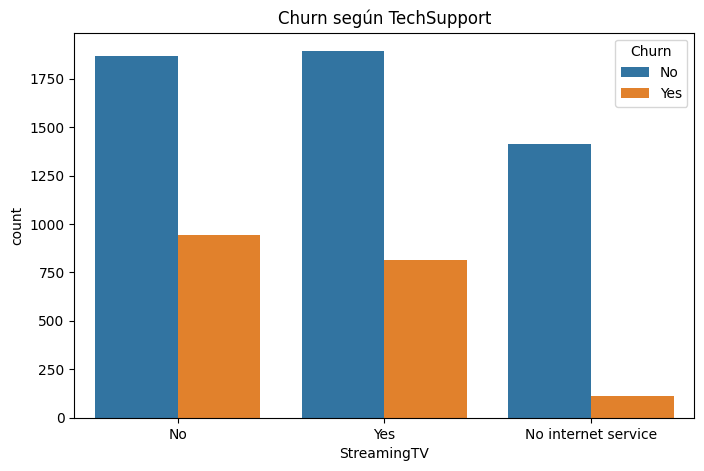

In [24]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='StreamingTV', hue='Churn')
plt.title("Churn según StreamingTV")
plt.show()


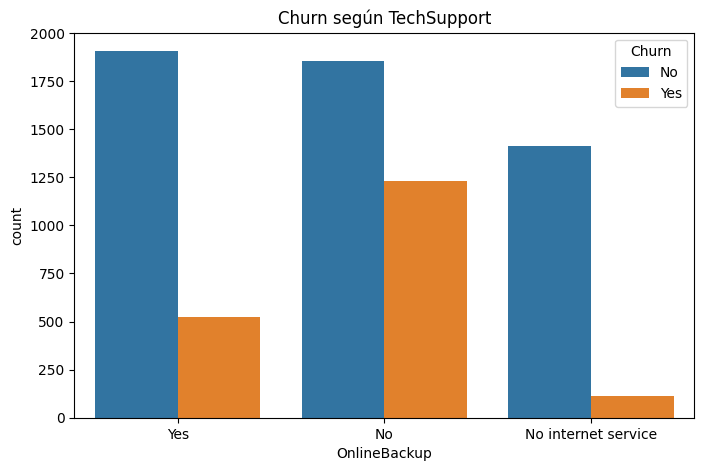

In [25]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='OnlineBackup', hue='Churn')
plt.title("Churn según TechSupport")
plt.show()


# Pipeline Prototipo

In [26]:
data= df.copy()

data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

data= data.drop(columns=['customerID'])



data.isna().sum()


,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [27]:
#Elimino las nulas, son solo el 0.15%

data= data.dropna()
data.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [28]:
X = data.drop(columns=['Churn'])
y = data['Churn']

y = y.map({'Yes':1,'No':0}) #mapeamos a numericos el si y el no

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

num_features, cat_features

(Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object'),
 Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
        'PaperlessBilling', 'PaymentMethod'],
       dtype='object'))

In [30]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ]
  )

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [34]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred_prob))


              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1033
           1       0.49      0.80      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.74      1407

AUC: 0.8351344145860403
